In [418]:
import numpy as np
from matplotlib import pyplot as plt

# Machine learning functions
from sklearn import datasets
from sklearn.manifold import Isomap
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [419]:
# Load the data set and print some infromations about it
digits = datasets.load_digits()
print(digits.images.shape)
print(digits.data.shape)
print(digits.keys())

(1797, 8, 8)
(1797, 64)
dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


In [420]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

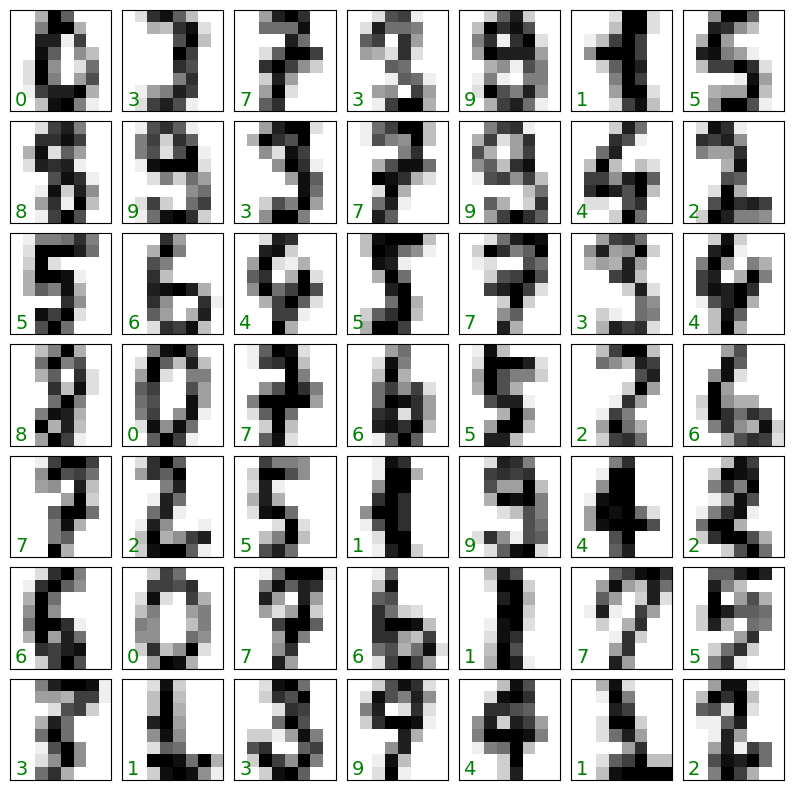

In [421]:
# This is just a plot of some elements of the data set
fig, axes = plt.subplots(7,7, figsize=(10, 10))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

# np.random.seed(42)
mychoices = np.random.choice(digits.images.shape[0], 100)

for i, ax in enumerate(axes.flat):
    ax.imshow((digits.images[mychoices[i]]), cmap='binary')
    ax.text(0.05, 0.05, str(digits.target[mychoices[i]]), transform=ax.transAxes, color='green', fontsize=14)
    ax.set_xticks([])
    ax.set_yticks([])

In [422]:
# Initialise the Isomap to embedd the data
embedding = Isomap(n_components=2)

In [423]:
# Run the fit_transform() function to get a 2D set of feauture
data_transformed = embedding.fit_transform(digits.data)

/Users/Federico/Library/Python/3.12/lib/python/site-packages/sklearn/manifold/_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.12/site-packages/scipy/sparse/_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


In [424]:
print(data_transformed.shape)

(1797, 2)


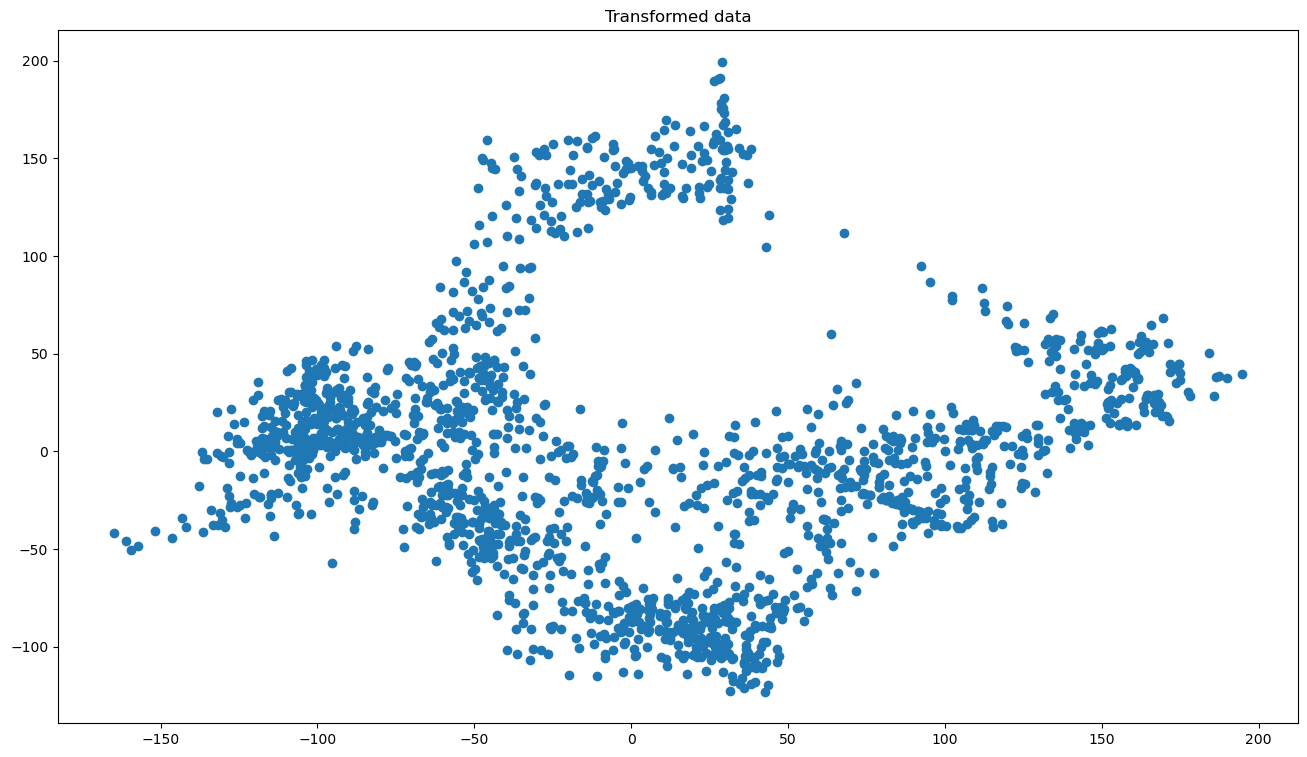

In [425]:
# Plot the transformed data
fig, ax = plt.subplots(figsize=(16,9))
ax.set_title("Transformed data")

ax.scatter(data_transformed[:, 0], data_transformed[:, 1])

In [426]:
# Split the data set into 80 % training set and 20 % test set
# Include also the targets
training_set, test_set, training_target, test_target = train_test_split(digits.data, digits.target, train_size=0.8)
print(training_set.shape, test_set.shape, training_target.shape, test_target.shape)

(1437, 64) (360, 64) (1437,) (360,)


In [427]:
# Initialise and train a "Logistic Regression" classification algorithm
# solver='sag' is there because suggested
lr = LogisticRegression(solver='sag')
lr.fit(training_set, training_target)

/Users/Federico/Library/Python/3.12/lib/python/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(solver='sag')

In [428]:
# Use the test set to train the model
predicted_target = lr.predict(test_set)
predicted_target.shape

(360,)

In [429]:
# Print the accuracy score of the model
print("Accuracy score:", accuracy_score(test_target, predicted_target))

Accuracy score: 0.9666666666666667


In [430]:
# Print the confusion matrix to check the accuracy on each digit
print("Confusion matrix:\n")
print(confusion_matrix(test_target, predicted_target, labels=digits.target_names))

Confusion matrix:

[[35  0  0  0  0  0  0  0  0  0]
 [ 0 37  2  0  0  0  1  0  0  0]
 [ 0  0 38  0  0  0  0  0  0  0]
 [ 0  0  1 37  0  0  0  1  0  0]
 [ 0  1  0  0 39  0  0  0  0  0]
 [ 0  0  0  0  0 29  0  0  0  0]
 [ 0  0  0  0  0  0 37  0  1  0]
 [ 0  0  0  0  0  0  0 33  0  2]
 [ 0  1  0  0  0  0  0  0 42  0]
 [ 0  0  0  1  0  0  0  0  1 21]]
